<a href="https://colab.research.google.com/github/emcgeever-husky/Econ3916/blob/main/Lab%207/Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Main Idea: Visualizing why "The House Always Wins" and calculating Sampling Error

In [10]:
# Break even formula for betting odds
placed_capital = 110
payout = 100

win_rate_to_break_even = round((placed_capital / (placed_capital+ payout)) * 100, 2)
print(f"Must win {win_rate_to_break_even}% of the time to break even")

Must win 52.38% of the time to break even


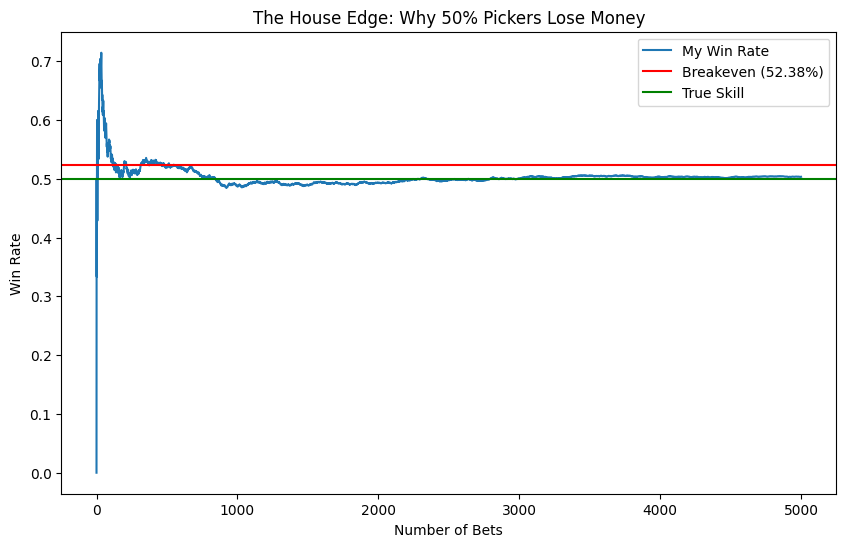

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Setup
true_skill = 0.50       # You win 50% of the time
breakeven = 0.5238      # -110 odds requires 52.38% to profit
n_bets = 5000           # Simulating a full season

# 2. Simulate
outcomes = np.random.choice([0,1], size=n_bets,p=[1-true_skill,true_skill])
cumulative_win_rate = np.cumsum(outcomes) / np.arange(1, n_bets+1)

# 3. Plot
plt.figure(figsize=(10,6))
plt.plot(cumulative_win_rate, label="My Win Rate")
plt.axhline(breakeven, color='red', label="Breakeven (52.38%)")
plt.axhline(true_skill, color='green', label="True Skill")
plt.legend()
plt.title("The House Edge: Why 50% Pickers Lose Money")
plt.xlabel("Number of Bets")
plt.ylabel("Win Rate")
plt.show()

Sampling Error Audit:
Sample 1: Mean = 33.97% | Error = -1.30%
Sample 2: Mean = 36.08% | Error = +0.81%
Sample 3: Mean = 35.73% | Error = +0.46%


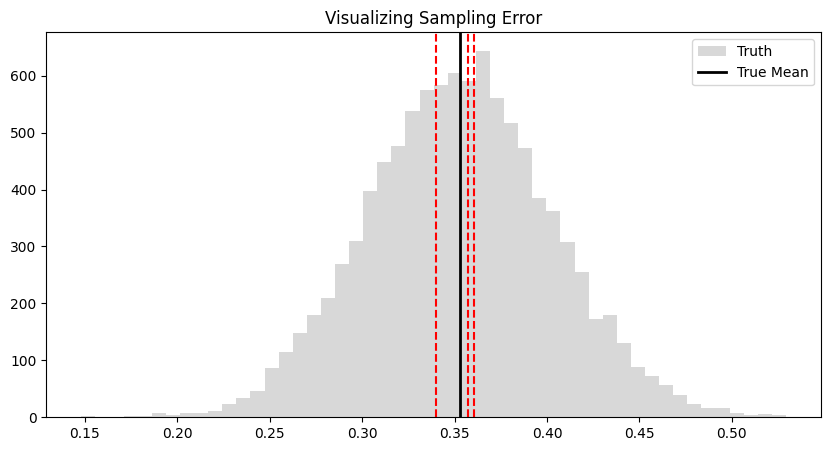

In [19]:
# 1. The "Unknown" Truth
true_mu = 0.3527  # Matching the "True Population Mean"

# 2. Simulate 3 distinct "Samples" (e.g., 3 different users)
samples = []
print(f"Sampling Error Audit:")

for i in range(3):
    # Draw 50 random bets
    sample = np.random.normal(true_mu, 0.05, 50)

    # Calculate stats
    x_bar = np.mean(sample)
    error = x_bar - true_mu

    print(f"Sample {i+1}: Mean = {x_bar:.2%} | Error = {error:+.2%}")
    samples.append(x_bar)

# 3. Quick Visual Check
plt.figure(figsize=(10,5))
plt.hist(np.random.normal(true_mu, 0.05, 10000), bins=50, alpha=0.3, color='gray', label='Truth')
for mean in samples:
    plt.axvline(mean, color='red', linestyle='--') # Our Samples
plt.axvline(true_mu, color='black', linewidth=2, label='True Mean')
plt.title("Visualizing Sampling Error")
plt.legend()
plt.show()

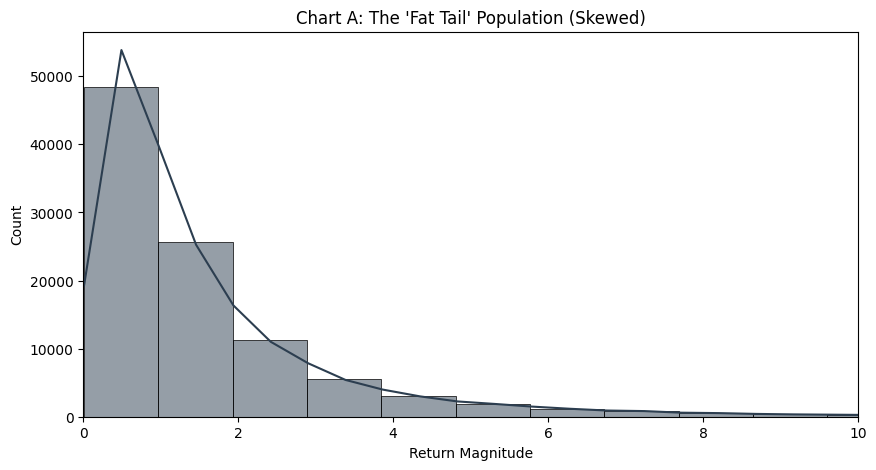

In [20]:
import seaborn as sns

# 1. Define the "Crypto Universe" (Population)
# Log-Normal matches the skewed "Hump + Long Tail" shape of markets
population_data = np.random.lognormal(mean=0, sigma=1.0, size=100000)

# 2. Visualize the Chaos
plt.figure(figsize=(10, 5))
sns.histplot(population_data, bins=100, kde=True, color='#2c3e50')
plt.xlim(0, 10)  # Crop to see the shape clearly
plt.title("Chart A: The 'Fat Tail' Population (Skewed)")
plt.xlabel("Return Magnitude")
plt.show()

Understanding

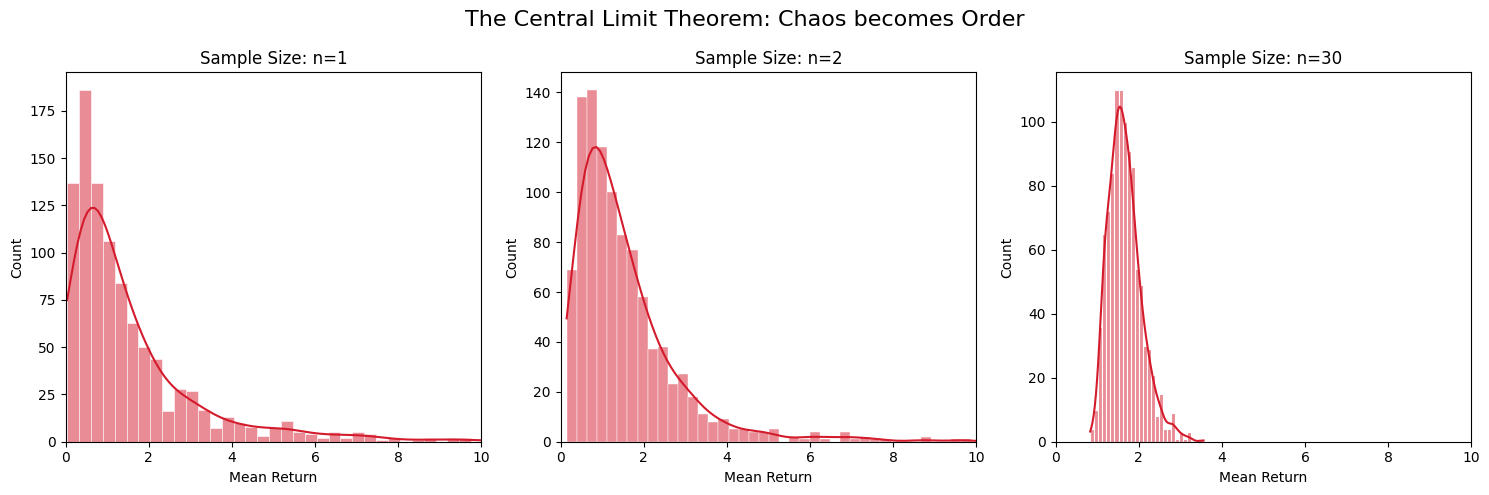

In [24]:
# Setup: Compare 3 sample sizes to match the slide
sample_sizes = [1, 2, 30]
simulations = 1000

plt.figure(figsize=(15, 5))

for i, n in enumerate(sample_sizes):
    # 1. The Loop: Calculate 1000 averages
    means = []
    for _ in range(simulations):
        sample = np.random.choice(population_data,size=n)
        means.append(np.mean(sample))

    # 2. Plotting
    plt.subplot(1, 3, i+1)
    sns.histplot(means, kde=True, color='#d41b2c', edgecolor='white')
    plt.title(f"Sample Size: n={n}")
    plt.xlabel("Mean Return")
    plt.xlim(0, 10)

plt.suptitle("The Central Limit Theorem: Chaos becomes Order", fontsize=16)
plt.tight_layout()
plt.show()

The Soup Analogy (Understanding sample size)

In [29]:
# 1. Setup: Two Populations, same variance, vastly different sizes
std_dev = 15000  # Variation in spending
n = 100         # We only sample 100 users (The "Teaspoon")
n_2 = 1000000   # much larger sample size

# 2. Calculate Margin of Error (1.96 * sigma / sqrt(n))
# Notice: Big 'N' (Population Size) is NOT in this formula!
margin_error = 1.96 * std_dev / np.sqrt(n)
margin_error_2 = 1.96 * std_dev / np.sqrt(n_2)

print(f"--- The Soup Analogy ---")
print(f"Population: 1,000 users   | Margin of Error: ±${margin_error:,.2f}")
print(f"Population: 1,000,000 users | Margin of Error: ±${margin_error_2:,.2f}")
print(f"Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.")

--- The Soup Analogy ---
Population: 1,000 users   | Margin of Error: ±$2,940.00
Population: 1,000,000 users | Margin of Error: ±$29.40
Conclusion: The pot size doesn't matter. Only the spoon size (n) matters.


The VC Audit (Robust vs. Volatile)

In [30]:
# Metric: LTV/CAC Ratio (Target > 3.0)
mean_val = 4.0
n_samples = 50

# Compare Stable (A) vs Volatile (B) Companies
sigma_A = 0.5  # Stable
sigma_B = 6.0  # Volatile

moe_A = 1.96 * sigma_A / np.sqrt(n_samples)
moe_B = 1.96 * sigma_B / np.sqrt(n_samples)

print("\n--- VC Audit: Series C Benchmark (> 3.0) ---")

print(f"Startup A (Stable):")
print(f"   95% CI: [{mean_val - moe_A:.1f}, {mean_val + moe_A:.1f}]")
print(f"   Decision: INVEST. (Lower bound > 3.0)")

print(f"\nStartup B (Volatile):")
print(f"   95% CI: [{mean_val - moe_B:.1f}, {mean_val + moe_B:.1f}]")
print(f"   Decision: PASS. (Lower bound implies potential loss)")




--- VC Audit: Series C Benchmark (> 3.0) ---
Startup A (Stable):
   95% CI: [3.9, 4.1]
   Decision: INVEST. (Lower bound > 3.0)

Startup B (Volatile):
   95% CI: [2.3, 5.7]
   Decision: PASS. (Lower bound implies potential loss)


Phase 4: GenAI Expansion — The "P.R.I.M.E." Protocol

In [32]:
import numpy as np

# REFACTORED MODEL: Correlated Revenue & Burn
# rho = -0.7: When Revenue drops, Burn also drops (management cuts costs).
# rho = +0.7: When Revenue rises, Burn also rises (scaling spend with income).

n_simulations = 1000
months = 24
start_cash = 2_000_000
bankruptcies = 0

# --- Distribution Parameters ---
mu_rev, sigma_rev = 80_000, 30_000
mu_burn, sigma_burn = 100_000, 10_000

# --- Correlation ---
# Change rho sign here: negative = counter-cyclical (cost-cutting), positive = pro-cyclical
rho = -0.7  # swap to +0.7 if you want spend to scale with revenue

# --- Covariance Matrix ---
# cov(X,Y) = rho * sigma_X * sigma_Y
cov_rev_burn = rho * sigma_rev * sigma_burn

cov_matrix = np.array([
    [sigma_rev**2,   cov_rev_burn],   # Var(Revenue),    Cov(Rev, Burn)
    [cov_rev_burn,   sigma_burn**2],  # Cov(Rev, Burn),  Var(Burn)
])

means = np.array([mu_rev, mu_burn])

print(f"Running Correlated Model (rho={rho})...")

for _ in range(n_simulations):
    cash = start_cash
    alive = True

    # Draw all 24 months at once: shape (months, 2) — column 0=Revenue, column 1=Burn
    monthly_draws = np.random.multivariate_normal(means, cov_matrix, size=months)

    for month in range(months):
        revenue = monthly_draws[month, 0]
        burn    = monthly_draws[month, 1]

        cash += (revenue - burn)

        if cash <= 0:
            alive = False
            break

    if not alive:
        bankruptcies += 1

prob_ruin = bankruptcies / n_simulations
print(f"Correlated Model (rho={rho}) Risk of Ruin: {prob_ruin:.1%}")
print("Note: rho<0 = cost-cutting behaviour; rho>0 = pro-cyclical spend.")

Running Correlated Model (rho=-0.7)...
Correlated Model (rho=-0.7) Risk of Ruin: 0.0%
Note: rho<0 = cost-cutting behaviour; rho>0 = pro-cyclical spend.


**Does this correlated model lower or raise the Probability of Ruin compared to the independent model? Why?**


**It lowers it.** Here's why that's actually intuitive once you see the mechanism.
In the independent model, bad revenue months and high burn months are unconnected — you can get hit by both simultaneously with no offsetting force. That's the worst-case compounding: revenue craters and burn stays elevated. The variance of your monthly net cash flow is just additive:

Var(Net) = Var(Revenue) + Var(Burn)

In the correlated model with rho=-0.7, bad revenue pulls burn down with it. The variance of net flow becomes:

Var(Net) = Var(Revenue) + Var(Burn) - 2 × |rho| × σ_rev × σ_burn

That last term is the variance reduction. Plugging in your numbers:

2 × 0.7 × 30,000 × 10,000 = 420,000,000

shaved off the variance. Your monthly swings are meaningfully tighter, which means fewer catastrophic drawdown sequences.

**The intuition:** ruin in these simulations isn't driven by the mean (you're already net negative at -$20k/month — you're expected to go bankrupt eventually). What rho controls is how often you get double-bad months that accelerate the runway collapse. Negative correlation suppresses those joint tail events.